# Making music in a Jupyter notebook



### "Music is the universal language of mankind."

               ― Henry Wadsworth Longfellow
                                            
                                            


### "Mathematics is the language in which God has written the universe."

                          ― Galileo Galilei
                                                       

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Audio
from IPython.display import YouTubeVideo

## Music is made of sounds; sound is created by vibrations

Let's look at a few seconds of this Youtube video showing guitar strings being strummed in super slow motion

In [2]:
def play_youtube(url, width=640, height=480, autoplay=1, **kwargs):
    id_ = url.split("=")[-1]
    return YouTubeVideo(id_, width=width, height=height, **kwargs)

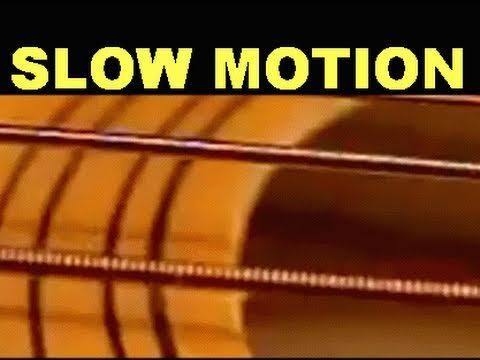

In [3]:
play_youtube("https://www.youtube.com/watch?v=6sgI7S_G-XI")

Q: What do these vibrating strings look like?

A: Sine waves!

## Music and Trigonometry

A sine wave is defined as:

### $y(t)=A*sin(2\pi ft)$
1. `f` is frequency (From Mariah Carey to Barry White?)
2. `A` is amplitude (From exploding windows to is this thing on?)

Frequency is measured in Hertz (Hz), or number of complete cycles per second

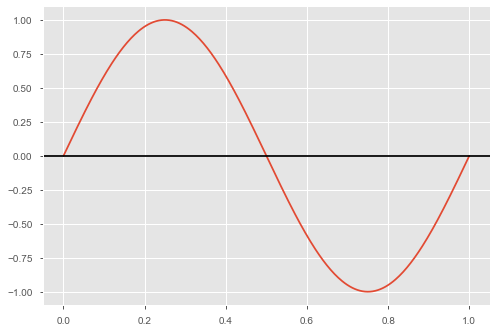

In [4]:
t = np.linspace(0, 1, 320)

data = np.sin(2 * np.pi * 1 * t) # <- 1 Hz

plt.plot(t, data)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')

### How does that sound?

#### WARNING: make sure your volume is not on full blast :)

In [5]:
# Amplitude (or volume) control is done by your laptop
# Let's focus on the frequency
def play(freq, sec=1):
    framerate = 44100 # <- rate of sampling
    t = np.linspace(0, sec, framerate * sec) # <- setup time values
    data = np.sin(2 * np.pi * freq * t) # <- sine function formula
    return Audio(data, rate=framerate, autoplay=True) # play the generated sound

In [6]:
play(440) # play a sound at 440 hz for 1 second

If we change the frequency, the sound is also different

In [7]:
play(495)

In [8]:
play(660)

### Fundamentally this is how instruments work

For example, string instruments (like the guitar we saw above) have different strings that vibrate at different frequencies. When we hold down our left hand on one of the strings, it's changing the frequency of the note by changing the length of the string.

### Also, this is what distinguishes music from noise

Instead of generating a regular sine wave with a single frequency, what if we just generated a signal with random numbers?

In [9]:
data = np.random.randn(44100)
Audio(data, rate=44100, autoplay=False)

Turns out nature also prefers patterns to randomness.

## Music and Multiplication

Previous we saw a sine wave visualized in regular cycles. When we think in terms of cycles per second, it means that for a given root frequency f, any power of 2 times f will generate sine waves that start and end together.

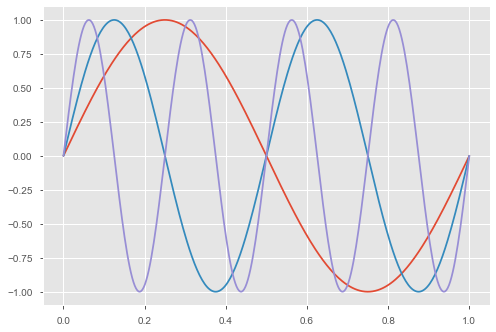

In [11]:
plt.plot(t, np.sin(2 * np.pi * 1 * t))
plt.plot(t, np.sin(2 * np.pi * 2 * t))
plt.plot(t, np.sin(2 * np.pi * 4 * t))

### How do multiples of two sound?

Visually we can clearly see the common pattern that all of these powers of 2 have. It turns out that there is a common pattern in the sound too

In [14]:
play(220) # choose a base frequency

In [15]:
play(220 * 2)

In [16]:
play(220 * 4)

Sounds like they have the same "quality", just at a higher or lower level right? 

In music, we call the distance between these powers of two an "octave". 

Now, if you still remember your Greek/Latin word roots, you should immediately be saying, "aha, octave means 8!" 

Indeed if you played a piano keyboard, you'll see that there are 8 white keys between two keys of the same letter, representing that they're of the same base frequency but differ by a power of 2.

### OK, so where did the other notes go?

### We can multiply by more than 2!

In [18]:
play(220)

In [19]:
play(220 * 3)

In [20]:
play(220 * 5)

## Music and Fractions

If we mapped out frequency multiples from 1–5, we'll see that they all represent different intervals between successive multiples. For example, going from 2x to 3x is called a "perfect fifth". 3x to 4x is a "perfect fourth". And 4x to 5x is a "major third".

<div>
  <img src="scales.png" width="320"/>
</div>

We can now use these relationships to fill in the octave. For example, a perfect fifth (so) is 3/2 times the base frequency and a perfect fourth (fa) is 4/3 times the base frequency. You can play the whole scale in the notebook.

In [21]:
# Do - a deer a female deer
root = 220
do = lambda x: x
play(do(root))

In [22]:
# Re - a drop of golden sunnnnn
re = lambda x: x * 9 / 8
play(re(root)) # "major second"

In [23]:
# Mi - a name I call myself
mi = lambda x: x * 5 / 4
play(mi(root)) # "major third"

In [24]:
# Fa - a long long way to run
fa = lambda x: x * 4 / 3
play(fa(root)) # "perfect fourth"

In [25]:
# So - A needle pulling thread
so = lambda x: x * 3 / 2
play(so(root)) # "perfect fifth"

In [26]:
# La - a note to follow so
la = lambda x: x * 5 / 3
play(la(root)) # "major sixth"

In [27]:
# Te - a drink with jam and bread
te = lambda x: x * 15 / 8
play(te(root)) # "major seventh"

In [28]:
# That will bring us back to Do, oh, oh, oh
play(do(root * 2)) # 

This is just one particular type of tuning system called "5-limit tuning" (because we use multiples up to 5). There are other systems like 3-limit Pythagorean tuning, just intonation, and equal temperament, each with their own advantages and drawbacks with small differences in the actual sounds.

## Turns out music and math are closely related. They're both the universal language!

It turns out music and math are pretty closely related. We've only explored the relationship between musical pitch and mathematical waves. Many other aspects of music like rhythm, meter, harmony, etc all have their parallels in mathematical concepts. So perhaps, math is the law of the universe, but it is through music that humans build an emotional connection to such abstract concepts.

Now, can you play melody using the Jupyter notebook? Notice how we've already defined the notes as functions. Here's an example to get you started

In [45]:
rest = lambda x: 0
notes = [do, re, mi, do, do, re, mi, do, mi, fa, so, rest, mi, fa, so]

root = 440
frequencies = np.array([f(root) for f in notes])

framerate = 44100
t = np.linspace(0, len(notes) / 2, framerate * len(notes) / 2)[:-1]
note_idx = np.floor(t * 2).astype(int)

data = np.sin(2 * np.pi * frequencies[note_idx] * t)

Audio(data, rate=framerate, autoplay=True)